# Housing Price Prediction

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statsmodel 
import statsmodels.api as sm

# Importing Lasso, Ridge and LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# scaling the features
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from scipy import stats 
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [3]:
filepath = 'C:/data/anitha-ml/Machine Learning/Advanced Regression/assignment/'

In [4]:
df_house= pd.read_csv(filepath+"train.csv",encoding='ISO-8859-1',low_memory=False)

In [5]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_house.shape

(1460, 81)

# Data Cleaning and EDA process

####  Impute and treat null values in the data set

In [7]:
# printing number of features
print('No of features available in the dataset are {} '.format(len(df_house.columns)))

No of features available in the dataset are 81 


In [8]:
round(df_house.isnull().sum()/len(df_house.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

### From the above we see that some of the features have higher percentage of null values. Taking into consideration 10% as the cut off, the following columns are dropped
- PoolQC, 
- Fence  
- MiscFeature 
- Alley   

In [9]:
column_names = ['PoolQC','Fence','MiscFeature','Alley']
df_house = df_house.drop(column_names,axis=1)

### Lets further analyze other features

In [10]:
round(df_house.isnull().sum()/len(df_house.index),2).sort_values(ascending=False).head(20)

FireplaceQu     0.47
LotFrontage     0.18
GarageFinish    0.06
GarageType      0.06
GarageCond      0.06
GarageQual      0.06
GarageYrBlt     0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
YearRemodAdd    0.00
RoofStyle       0.00
Exterior2nd     0.00
RoofMatl        0.00
Exterior1st     0.00
OverallCond     0.00
dtype: float64

#### Imputing the following columns with NA as No Garage and Garage Year Built with 0 for columns with NA
- GarageCond
- GarageType
- GarageFinish   
- GarageQual 
- FireplaceQu and
- LotFrontage     

In [11]:
df_house['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
df_house['GarageType'].replace({np.nan:'No Garage'},inplace=True)
df_house['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
df_house['GarageQual'].replace({np.nan:'No Garage'},inplace=True)
df_house['LotFrontage'].replace({np.nan:0},inplace=True)
df_house['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
df_house['GarageYrBlt'].replace({np.nan:0},inplace=True)

In [12]:
print('Garage Condition \n{}\n'.format(df_house['GarageCond'].value_counts()))
print('Garage Type \n{}\n'.format(df_house['GarageType'].value_counts()))
print('Garage Finish \n{}\n'.format(df_house['GarageFinish'].value_counts()))
print('Garage Quality \n{}\n'.format(df_house['GarageQual'].value_counts()))

Garage Condition 
TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

Garage Type 
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

Garage Finish 
Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

Garage Quality 
TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64



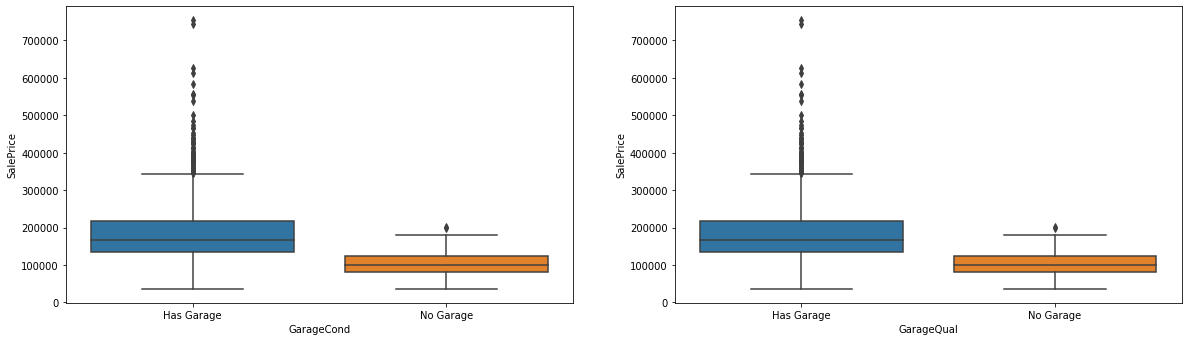

In [13]:
## Looking at the values, we can see that Garage Condition and Garage Quality values look alike. Lets try to see whether one of them can be dropped

df = df_house[['GarageCond','GarageQual','SalePrice']]

def garage_condition(x):
    if x in ['TA','Fa','Gd','Po','Ex']:
        return 'Has Garage'
    else:
        return 'No Garage'
## Considering values other than No Garage as having garage and replacing the values in the derived data set
df['GarageCond']= df['GarageCond'].apply(lambda x: garage_condition(x) )

df['GarageQual']= df['GarageQual'].apply(lambda x: garage_condition(x) )

# Analyzing Garage conditions and Quality
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x=df.GarageCond,y=df.SalePrice)

plt.subplot(2,2,2)
sns.boxplot(x=df.GarageQual,y=df.SalePrice)


### Both Garage Cond and Garage Quality seems to have same impact on the Sales price. Hence dropping Garage Quality

In [14]:
df_house= df_house.drop('GarageQual',axis=1)

#### Analyzing other basement feature with null values
- BsmtFinType2    
- BsmtFinType1    
- BsmtExposure    
- BsmtCond        
- BsmtQual        

In [15]:
df_house['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)
df_house['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
df_house['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)
df_house['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)
df_house['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)

In [16]:
print('Rating of basement finished area \n{}\n'.format(df_house['BsmtFinType1'].value_counts()))
print('Rating of basement finished area (if multiple types) \n{}\n'.format(df_house['BsmtFinType2'].value_counts()))
print('Refers to walkout or garden level walls \n{}\n'.format(df_house['BsmtExposure'].value_counts()))
print('Evaluates the general condition of the basement \n{}\n'.format(df_house['BsmtCond'].value_counts()))
print('Evaluates the height of the basement \n{}\n'.format(df_house['BsmtQual'].value_counts()))

Rating of basement finished area 
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

Rating of basement finished area (if multiple types) 
Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

Refers to walkout or garden level walls 
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

Evaluates the general condition of the basement 
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

Evaluates the height of the basement 
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64



In [17]:
round(df_house.isnull().sum()/len(df_house.index),3).sort_values(ascending=False).head(20)

MasVnrType      0.005
MasVnrArea      0.005
Electrical      0.001
SalePrice       0.000
ExterCond       0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
ExterQual       0.000
Foundation      0.000
BsmtUnfSF       0.000
BsmtQual        0.000
BsmtCond        0.000
BsmtExposure    0.000
BsmtFinType1    0.000
BsmtFinSF1      0.000
BsmtFinType2    0.000
YearRemodAdd    0.000
YearBuilt       0.000
dtype: float64

### Imputing the following variables
- MasVnrType
- MasVnrArea
- Electrical

In [18]:
df_house['MasVnrType'].fillna('None', inplace=True) 

# Impute MasVnrArea with 0 since they may not have Masonary Veneer Area
df_house['MasVnrArea'].fillna(0, inplace=True) 

#Since only one row has Electrical value as na we can drop that row
df_house = df_house[~(df_house['Electrical'].isnull())]

# Dropping id column as it doesnt add much value

df_house = df_house.drop('Id',axis=1)

In [19]:
df_house.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

##  Outlier Treatment

In [20]:
df_numeric = df_house.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Considering only non-categorical data

In [21]:
df_numeric = df_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)

df_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


In [22]:
df_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.612748,10517.363948,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,180930.394791
std,34.673850,9984.666267,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,79468.964025
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7549.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129950.000000
50%,63.000000,9477.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11603.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14388.400000,335.000000,1066.000000,117.400000,1232.000000,1602.400000,1680.000000,954.400000,0.000000,2158.600000,757.200000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17402.300000,456.000000,1274.000000,396.400000,1468.000000,1753.000000,1831.500000,1141.100000,0.000000,2466.200000,850.200000,335.000000,175.100000,180.300000,0.000000,160.000000,0.000000,0.000000,326200.000000
99%,137.420000,37593.680000,791.360000,1572.420000,830.560000,1797.100000,2155.100000,2219.520000,1419.040000,360.000000,3123.760000,1002.980000,505.520000,285.840000,261.100000,168.000000,268.100000,0.000000,700.000000,442629.620000


In [23]:
# consider only data within 5% and 95% quantile
def outlier_treatement(col,df):
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & 
                      (df[col] <= Q3 + 1.5*IQR)]
    
    plt.figure(figsize=(5,5))
    sns.boxplot(y=df[col])
    plt.suptitle('Range View for '+ col)
    plt.show()
    return df

   ### Performing Outlier treatment for numeric colums

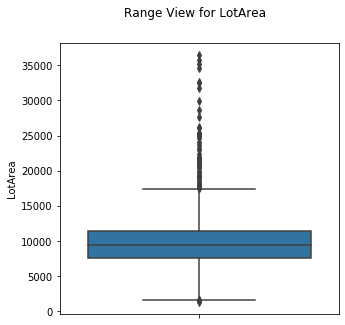

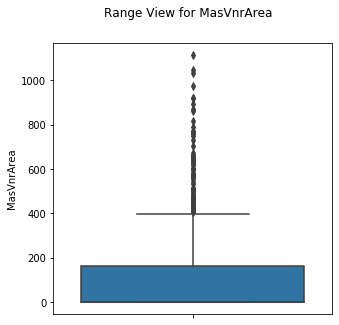

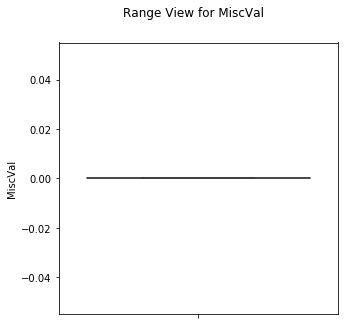

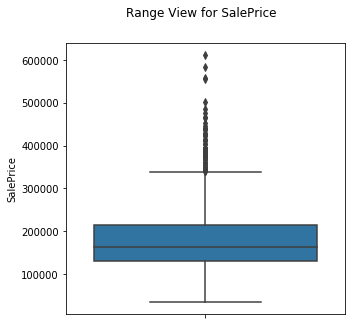

In [24]:
df_house=outlier_treatement('LotArea',df_house)
df_house=outlier_treatement('MasVnrArea',df_house)
df_house=outlier_treatement('MiscVal',df_house)
df_house=outlier_treatement('SalePrice',df_house)

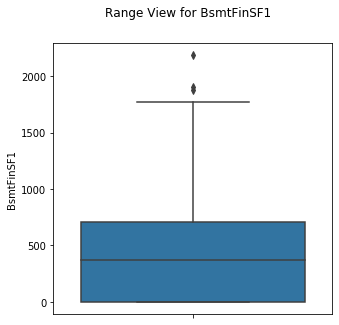

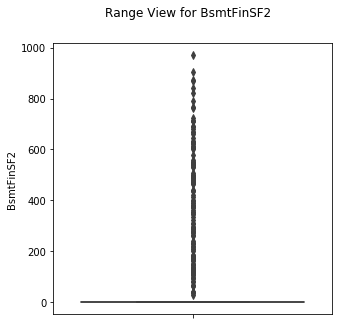

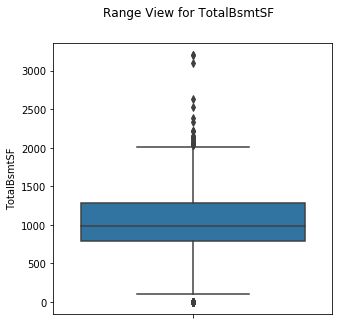

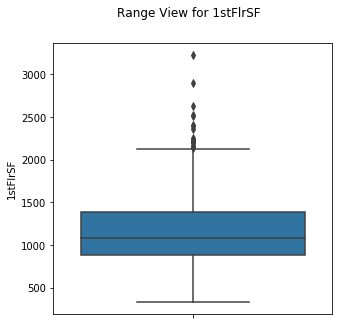

In [25]:
df_house=outlier_treatement('BsmtFinSF1',df_house)
df_house=outlier_treatement('BsmtFinSF2',df_house)
df_house=outlier_treatement('TotalBsmtSF',df_house)
df_house=outlier_treatement('1stFlrSF',df_house)

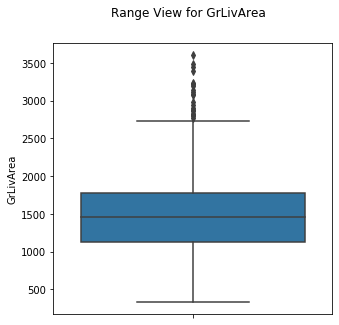

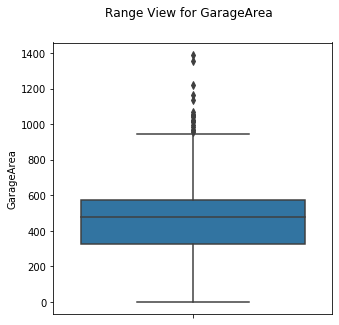

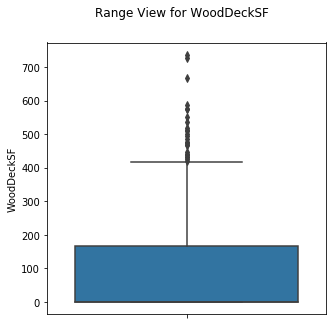

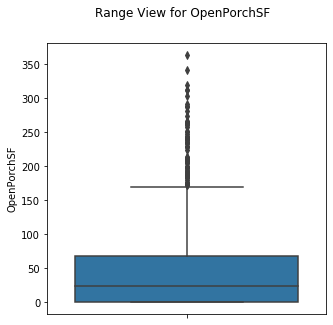

In [26]:
df_house=outlier_treatement('GrLivArea',df_house)
df_house=outlier_treatement('GarageArea',df_house)
df_house=outlier_treatement('WoodDeckSF',df_house)
df_house=outlier_treatement('OpenPorchSF',df_house)

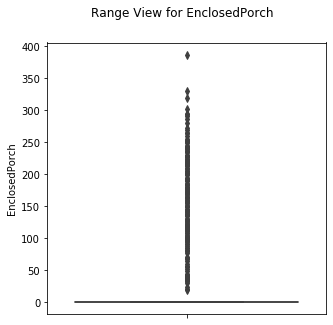

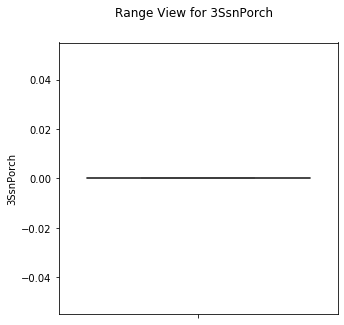

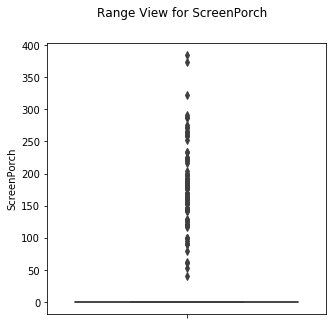

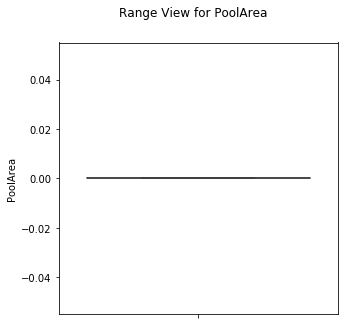

In [27]:
df_house=outlier_treatement('EnclosedPorch',df_house)
df_house=outlier_treatement('3SsnPorch',df_house)
df_house=outlier_treatement('ScreenPorch',df_house)
df_house=outlier_treatement('PoolArea',df_house)

### Dropping PoolAread and MiscVal and 3SsnPorch  since they contain only 0 after outlier treatment

In [28]:
df_house = df_house.drop(['PoolArea','3SsnPorch','MiscVal'],axis=1)

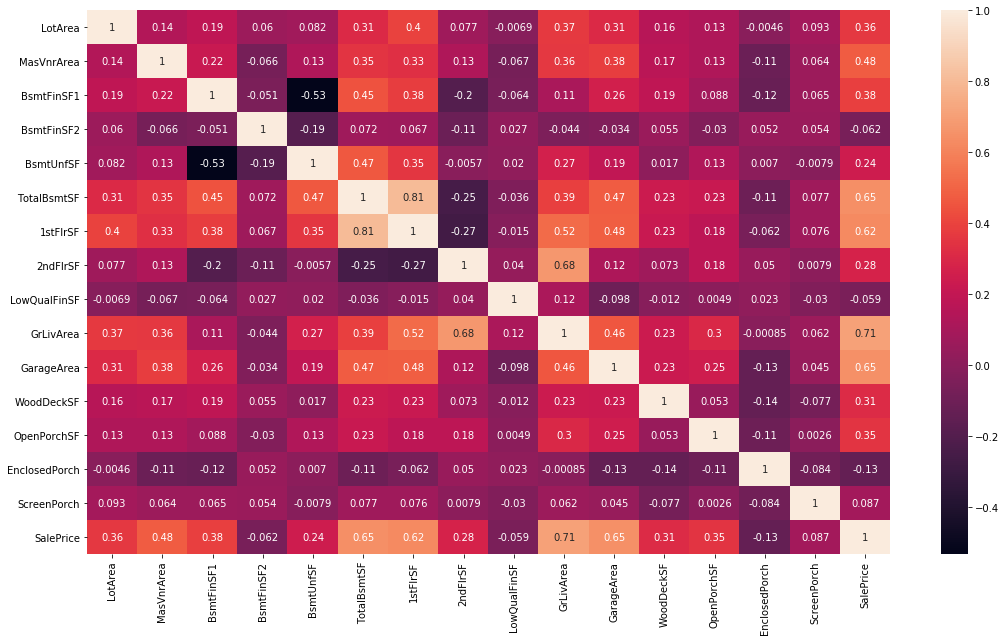

In [29]:
# plotting correlations on a heatmap

plt.figure(figsize=(18,10))
numeric_columns=['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice']

# heatmap
sns.heatmap(df_house[numeric_columns].corr(), annot=True)
plt.show()

### Observation
- We see high correlation between sales and GrLivArea, GarageArea, 1stFlrSf, TotalBsmtSf
- We see very low correlation between sales and BsmtFinSF2, LowQuanFinSF, and MiscVal

### Converting Year fields into age 
##### Ex by considering the max year built - the year built gives the age of the house
- Note max year for all the years in this data set is 2010

In [30]:
df_house['YearBuilt'] = df_house['YearBuilt'].astype('int')
df_house['YearRemodAdd'] = df_house['YearRemodAdd'].astype('int')
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype('int')
df_house['YrSold'] = df_house['YrSold'].astype('int')

df_house['YearBuilt'] = df_house['YearBuilt'].max()-df_house['YearBuilt']
df_house['YearRemodAdd'] = df_house['YearRemodAdd'].max()- df_house['YearRemodAdd']
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].max()-df_house['GarageYrBlt']
df_house['YrSold'] = df_house['YrSold'].max()-df_house['YrSold']

In [31]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1349 non-null   int64  
 1   MSZoning       1349 non-null   object 
 2   LotFrontage    1349 non-null   float64
 3   LotArea        1349 non-null   int64  
 4   Street         1349 non-null   object 
 5   LotShape       1349 non-null   object 
 6   LandContour    1349 non-null   object 
 7   Utilities      1349 non-null   object 
 8   LotConfig      1349 non-null   object 
 9   LandSlope      1349 non-null   object 
 10  Neighborhood   1349 non-null   object 
 11  Condition1     1349 non-null   object 
 12  Condition2     1349 non-null   object 
 13  BldgType       1349 non-null   object 
 14  HouseStyle     1349 non-null   object 
 15  OverallQual    1349 non-null   int64  
 16  OverallCond    1349 non-null   int64  
 17  YearBuilt      1349 non-null   int32  
 18  YearRemo

### Data Ananlysis to observe the trend the variables have with the SalesPrice

In [32]:
def plot_scatter(df , x , title):
    rows=1
    cols= len(x)
    plt.figure(figsize=(10,5))
    for i in range(0,cols):
        plt.subplot(rows,cols,i+1)
        axs= sns.scatterplot(x=df[x[i]],y=df['SalePrice'])
        axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
        plt.subplots_adjust(hspace = 1.0)
        plt.title(x[i]+' vs Price')
        plt.ylabel('Price')
        plt.xlabel(x[i])

    plt.tight_layout()
    plt.show()
    


### Analyzing the Garage related features vs Sales Price

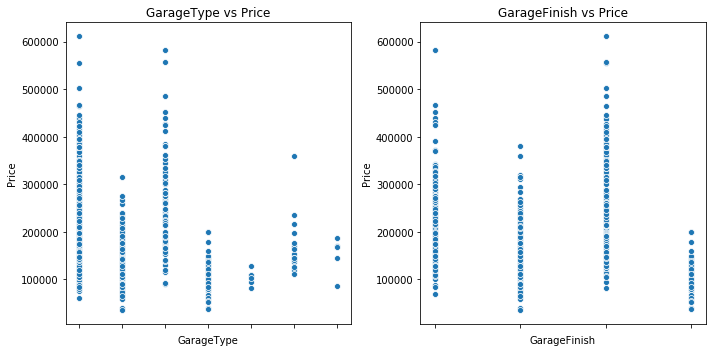

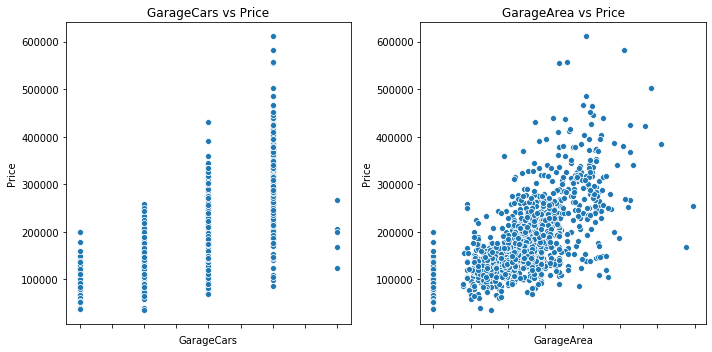

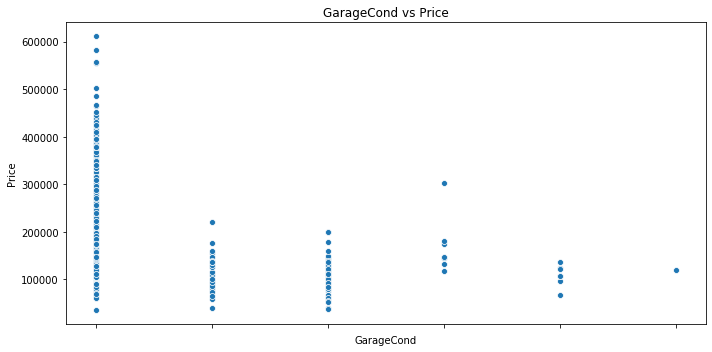

In [33]:
plot_scatter(df_house,['GarageType','GarageFinish'],' vs Price')
plot_scatter(df_house,['GarageCars','GarageArea'],' vs Price')
plot_scatter(df_house,['GarageCond'],' vs Price')

### Observation
- GarageArea seems to have good linear relationship with price. As the area increases, we see an increase in the price
- However, the other features doesnt seem to have any linear relationship. Lets analyze other features

### Analyzing the Basement related features vs Sales Price

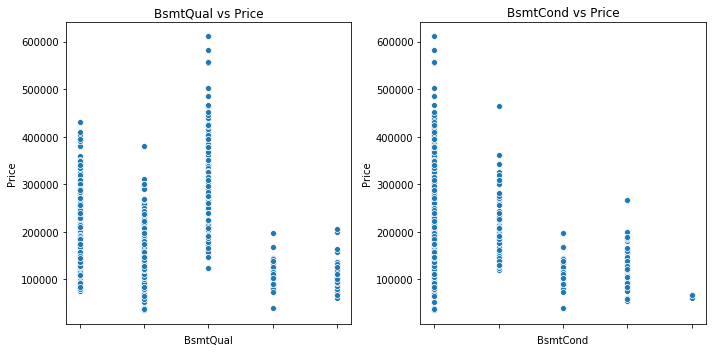

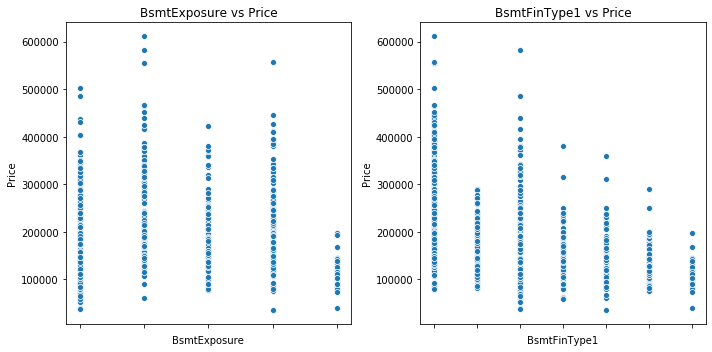

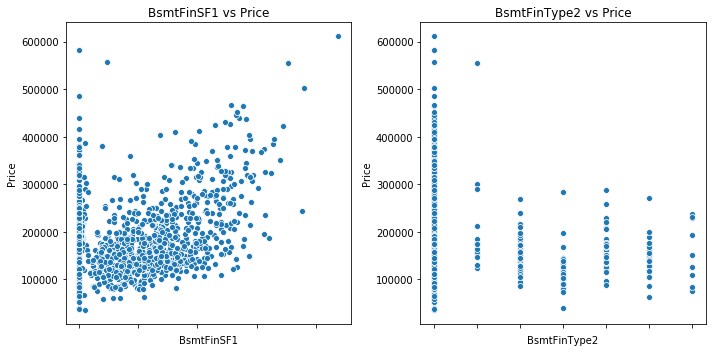

In [34]:
plot_scatter(df_house,['BsmtQual','BsmtCond'],' vs Price')
plot_scatter(df_house,['BsmtExposure','BsmtFinType1'],' vs Price')
plot_scatter(df_house,['BsmtFinSF1','BsmtFinType2'],' vs Price')

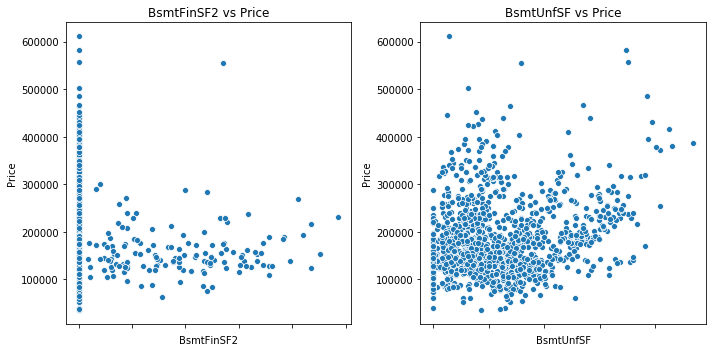

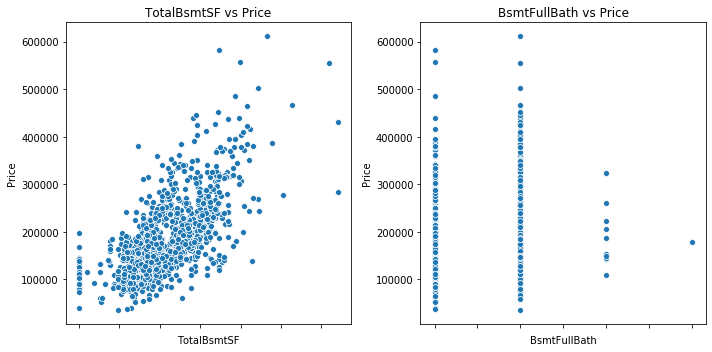

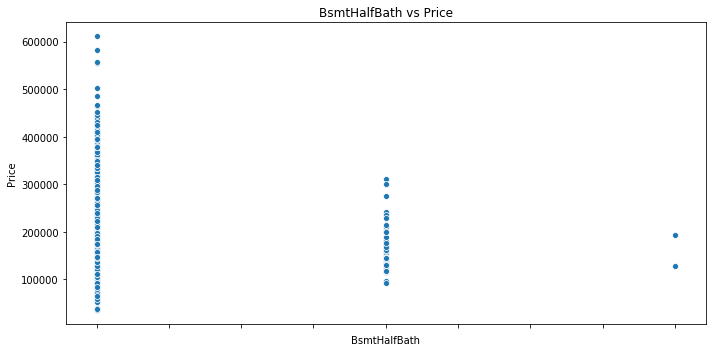

In [35]:
plot_scatter(df_house,['BsmtFinSF2','BsmtUnfSF'],' vs Price')
plot_scatter(df_house,['TotalBsmtSF','BsmtFullBath'],' vs Price')
plot_scatter(df_house,['BsmtHalfBath'],' vs Price')

### Observation
- From the above, its clearly visible that  TotalBsmtSF,BsmtUntSF and BsmtFinSF1 have linear relationship with the Sales price

- The other features needs to be analyzed further to see whether they have an impact on the price or not

### Analyzing the Porch features vs Sales Price

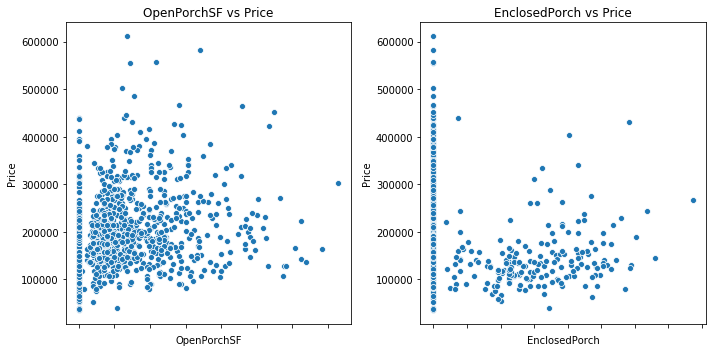

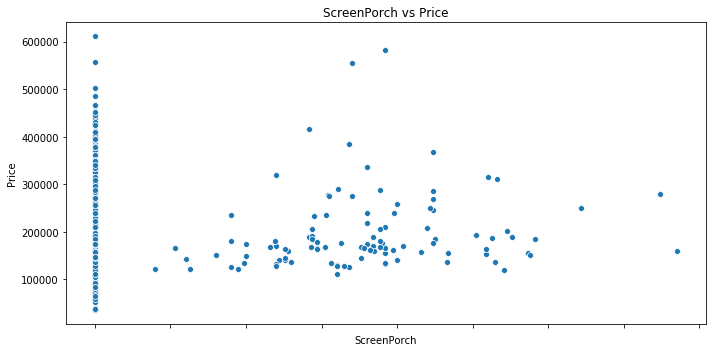

In [36]:
plot_scatter(df_house,['OpenPorchSF','EnclosedPorch'],' vs Price')
plot_scatter(df_house,['ScreenPorch'],' vs Price') 

### Observation
- From the above, we can see that OpenPorchSF and EnclosedPorch has good linear relationship with price compared to ScreenPorch

- Lets do some analysis on our main predictor variable SalesPrice and understand its distribution

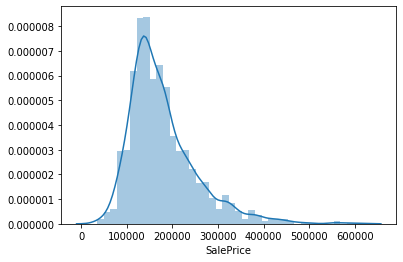

In [37]:
sns.distplot(df_house['SalePrice'])

### Observation
- Saleprices seems to be mostly distributed between 100000 to 200000. But the tail is extending till 600000.
- Lets do box-cox analysis


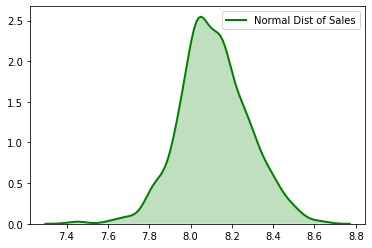

In [38]:
sales_after_transformation, fitted_lambda = stats.boxcox(df_house['SalePrice']) 
  
# creating axes to draw plots 

  
sns.distplot(sales_after_transformation, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal Dist of Sales", color ="green") 

### Observation
- Sales price seems to be more normally distributed now. Applying the log transformation to sales price

In [39]:
df_house['SalePrice']=sales_after_transformation

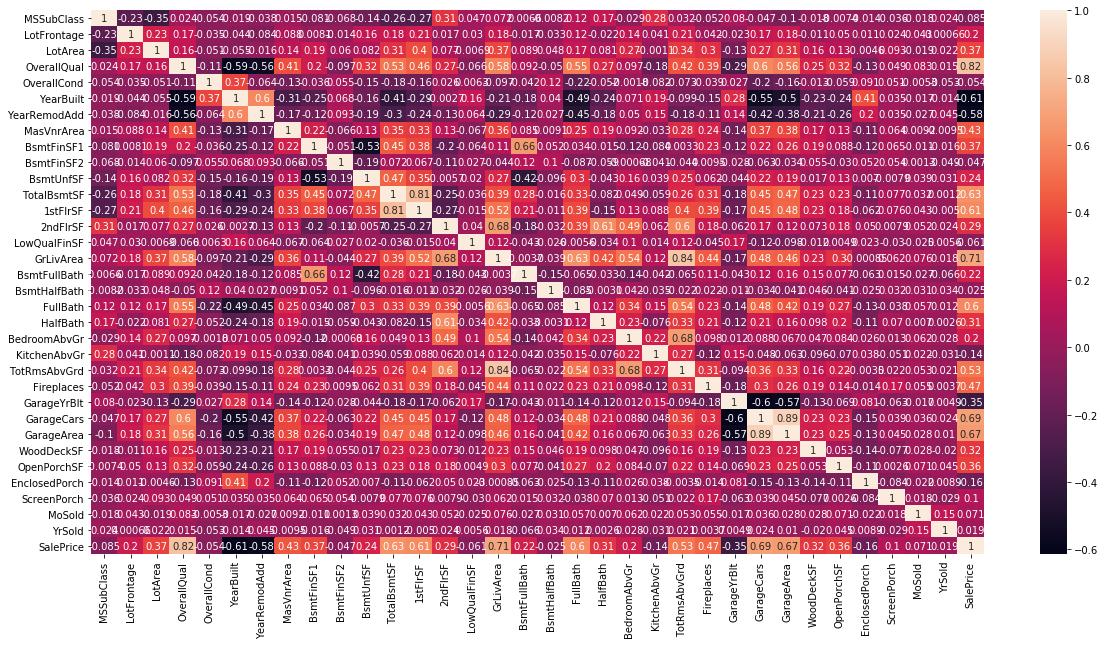

In [40]:
plt.figure(figsize=(20,10))


sns.heatmap(df_house.corr(), annot=True)

plt.show()

###  Lets analyze top features having higher correlation with the Sales Price
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrnd
- YearBuilt

### Overall Quality Vs Sales

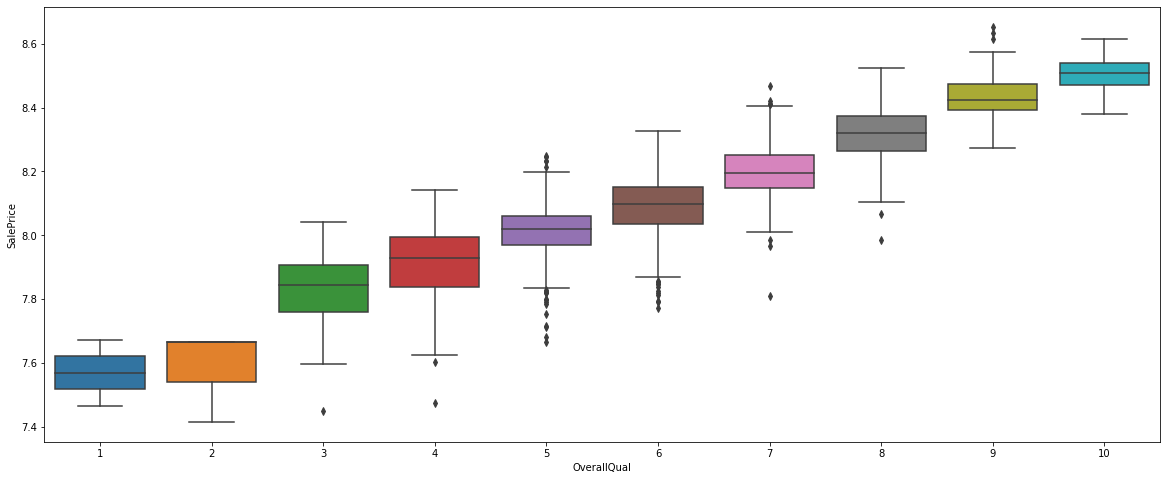

In [41]:
plt.figure(figsize=(20,8))
sns.boxplot(
    data=df_house,
    x="OverallQual", y="SalePrice"
)
plt.show()

### Observation 
- As the overall quality increases, the price of the house also increases

### GrLivArea vs Sales Price

<Figure size 648x720 with 0 Axes>

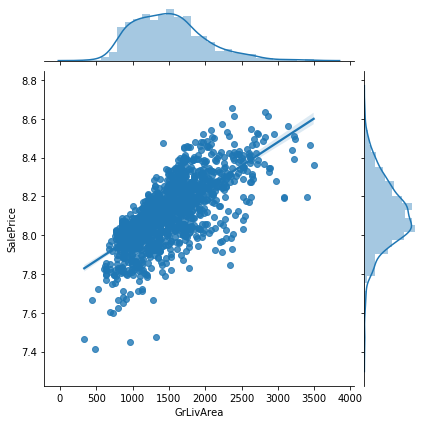

In [42]:
plt.figure(figsize=(9,10))
sns.jointplot(
    data=df_house,
    x="GrLivArea", y="SalePrice",
    kind="reg"
)
plt.show()

### Observation
- People seem to pay more price for the GrLivArea.  
- We can see positive correlation between Saleprice and GrLivArea

### Compare Garage cars abd Garage Area vs Sales Price

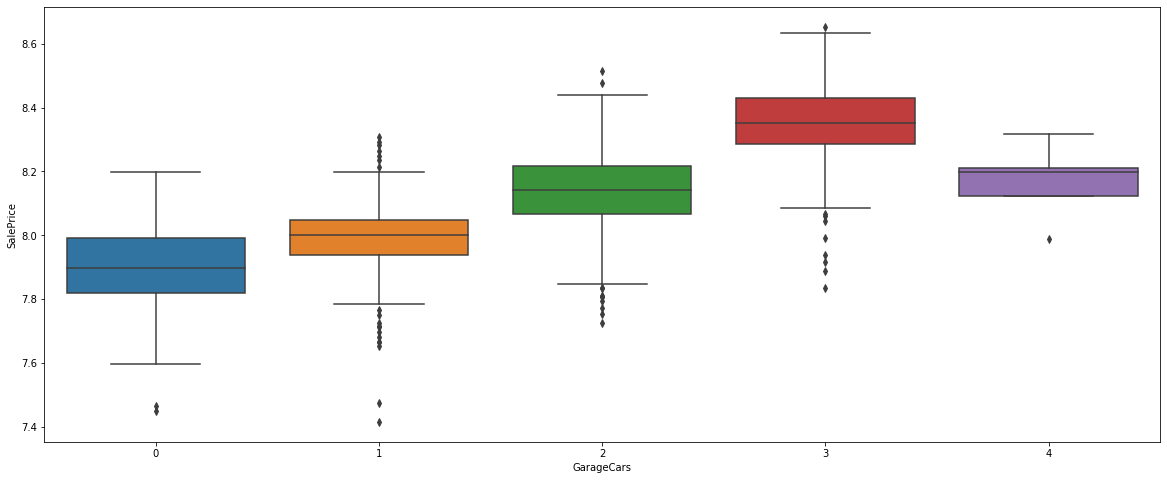

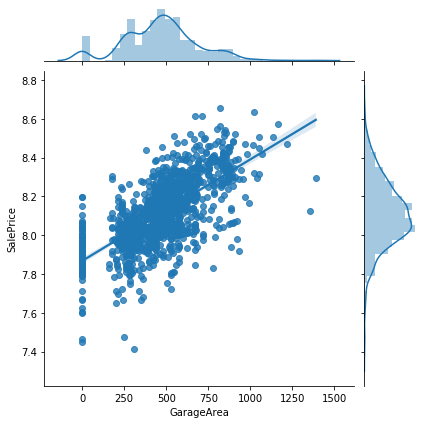

In [43]:
plt.figure(figsize=(20,8))

sns.boxplot(
    data=df_house,
    x="GarageCars", y="SalePrice"
)
sns.jointplot(
    data=df_house,
    x="GarageArea", y="SalePrice",kind='reg'
)

plt.show()

### Observation
- With the increase in number of Garage Cars , we see increasing trend in price. However, Garage Cars with 4 seem to have lower price
- We see positive correlation between garage area and SalePrice

### TotalBsmtSF vs Sales Price

<Figure size 648x720 with 0 Axes>

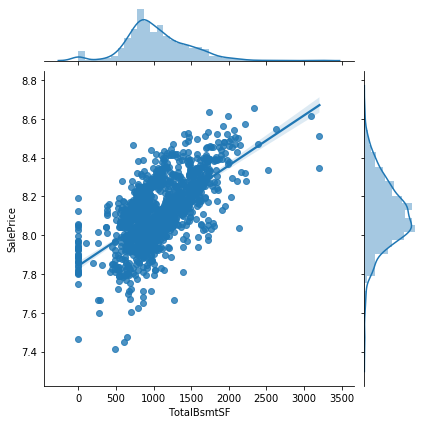

In [44]:
plt.figure(figsize=(9,10))
sns.jointplot(
    data=df_house,
    x="TotalBsmtSF", y="SalePrice",
    kind="reg"
)
plt.show()

### Observation
- From the above we can see that TotalBsmtSF between 1000 to 2000 SF have higher price
- Similarly as the TotalBsmtSF area increases there is increase in Sales Price

### 1stFlrSF vs Sales price

<Figure size 648x720 with 0 Axes>

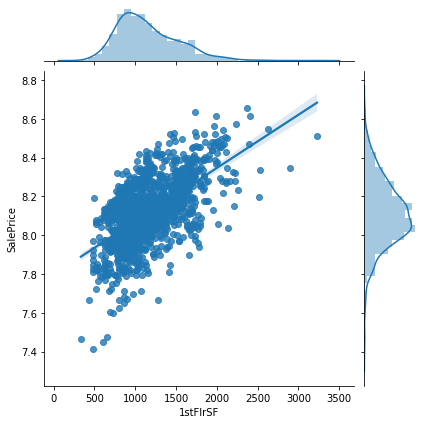

In [45]:
plt.figure(figsize=(9,10))
sns.jointplot(
    data=df_house,
    x="1stFlrSF", y="SalePrice",
    kind="reg"
)
plt.show()


### Observation
- From the above we can see that 1stFlrSF Price starts to increase between 500 to 2000 SF
- Similarly as the 1stFlrSF area increases there is increase in Sales Price

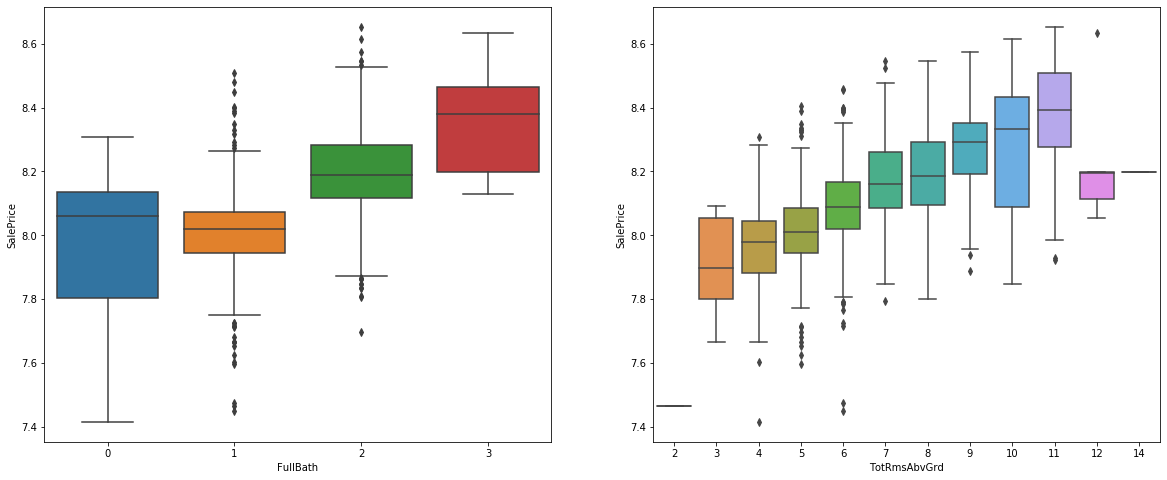

In [46]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(
    data=df_house,
    x="FullBath", y="SalePrice"
)

plt.subplot(1,2,2)
sns.boxplot(
    data=df_house,
    x="TotRmsAbvGrd", y="SalePrice"
)


plt.show()

### Observation
- With the increase in number of Full Baths we see the Sales price also increases
- For the TotRmsAbvGrnd, we can observe that with the increase in rooms the price increases, however houses with 14 rooms to have lower price. Probably its one of very old houses


### YearBuilt Vs Sales Price

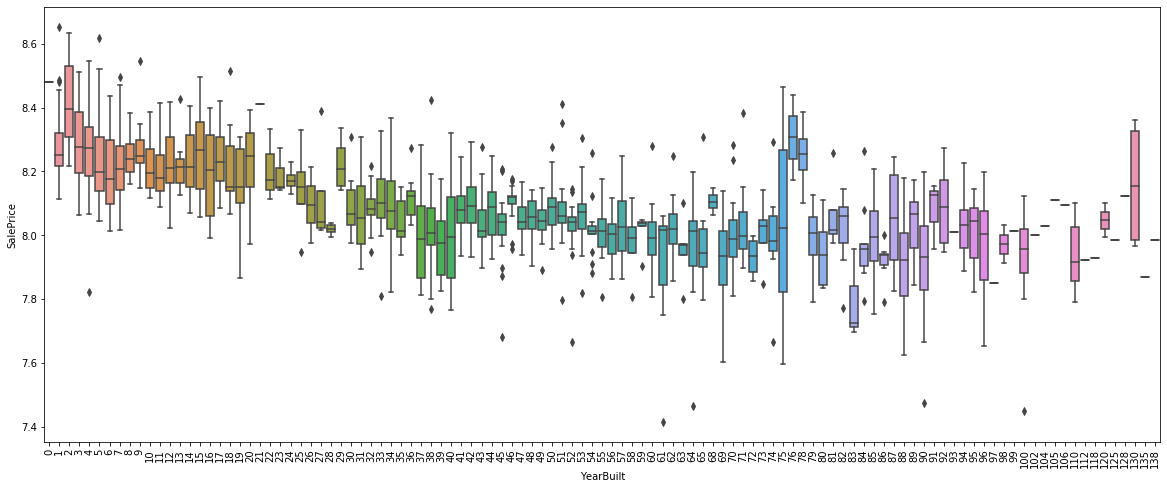

In [47]:

plt.figure(figsize=(20,8))
axs =sns.boxplot(
    data=df_house,
    x="YearBuilt", y="SalePrice"
)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

### Observation
- WE can see a that the prices are going up and down even if the age of the house is old. Probably because these houses may be having higher total sq.ft or probably because of the location of the houses

## Lets start with Model building

#### Steps followed for model building
- Create Dummy variables for Categorical Values
- Split to data into Train and test
- Standardize the scaler 
- Build Model using Ridge and Lasso and compare the outputs

In [48]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1349 non-null   int64  
 1   MSZoning       1349 non-null   object 
 2   LotFrontage    1349 non-null   float64
 3   LotArea        1349 non-null   int64  
 4   Street         1349 non-null   object 
 5   LotShape       1349 non-null   object 
 6   LandContour    1349 non-null   object 
 7   Utilities      1349 non-null   object 
 8   LotConfig      1349 non-null   object 
 9   LandSlope      1349 non-null   object 
 10  Neighborhood   1349 non-null   object 
 11  Condition1     1349 non-null   object 
 12  Condition2     1349 non-null   object 
 13  BldgType       1349 non-null   object 
 14  HouseStyle     1349 non-null   object 
 15  OverallQual    1349 non-null   int64  
 16  OverallCond    1349 non-null   int64  
 17  YearBuilt      1349 non-null   int32  
 18  YearRemo

In [49]:
def centralair_map(x):
    return x.map({'Y': 1, "N": 0})
df_house['CentralAir']= df_house[['CentralAir']].apply(centralair_map)

In [50]:
def bsmt_map(x):
    return x.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_house['BsmtCond']= df_house[['BsmtCond']].apply(bsmt_map)
df_house['BsmtQual']= df_house[['BsmtQual']].apply(bsmt_map)

In [51]:
def qc_map(x):
    return x.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_house['ExterQual']= df_house[['ExterQual']].apply(qc_map)
df_house['HeatingQC']= df_house[['HeatingQC']].apply(qc_map)
df_house['ExterCond']= df_house[['ExterCond']].apply(qc_map)
df_house['KitchenQual']= df_house[['KitchenQual']].apply(qc_map)

In [52]:
def fr_place_map(x):
    return x.map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_house['FireplaceQu']= df_house[['FireplaceQu']].apply(fr_place_map)

In [53]:
def grg_map(x):
    return x.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_house['GarageCond']= df_house[['GarageCond']].apply(grg_map)

In [54]:
def lnd_slope_map(x):
    return x.map({'Gtl':0,'Mod':1,'Sev':2})
df_house['LandSlope']= df_house[['LandSlope']].apply(lnd_slope_map)

In [55]:
def bsmt_exp_map(x):
    return x.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df_house['BsmtExposure']= df_house[['BsmtExposure']].apply(bsmt_exp_map)

In [56]:

def bsmt_type_map(x):
    return x.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_house['BsmtFinType1'] = df_house[['BsmtFinType1']].apply(bsmt_type_map)
df_house['BsmtFinType2'] = df_house[['BsmtFinType2']].apply(bsmt_type_map)

In [57]:

def lot_shape_map(x):
    return x.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df_house['LotShape'] = df_house[['LotShape']].apply(lot_shape_map)

In [58]:
def grg_finish_map(x):
    return x.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
df_house['GarageFinish'] = df_house[['GarageFinish']].apply(grg_finish_map)

In [59]:
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,0,Attchd,7,2,2,548,3,Y,0,61,0,0,2,2,WD,Normal,8.215102
1,20,RL,80.0,9600,Pave,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,34,34,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,3,Attchd,34,2,2,460,3,Y,298,0,0,0,5,3,WD,Normal,8.156129
2,60,RL,68.0,11250,Pave,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,9,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,3,Attchd,9,2,2,608,3,Y,0,42,0,0,9,2,WD,Normal,8.244429
3,70,RL,60.0,9550,Pave,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,95,40,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,4,Detchd,12,1,3,642,3,Y,0,35,272,0,2,4,WD,Abnorml,8.044176
4,60,RL,84.0,14260,Pave,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,10,10,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,3,Attchd,10,2,3,836,3,Y,192,84,0,0,12,2,WD,Normal,8.291429


In [60]:
# Create dummy variables
def createDummyVariables(v,df):
    temp = pd.get_dummies(df[v], drop_first = True,prefix=v)
    df = pd.concat([df, temp], axis = 1)
    df= df.drop([v], axis = 1)
    return df

categorical_columns = ['MSZoning','Street','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
df_categorical = df_house[categorical_columns]
df_categorical.head()

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml
4,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal


In [61]:
for v in categorical_columns:
      df_categorical =createDummyVariables(v,df_categorical)

In [62]:
final = pd.concat([df_house, df_categorical], axis = 1)

In [63]:
final= final.drop(categorical_columns, axis=1)

In [64]:
final.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,7,7,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,7,2,2,548,3,0,61,0,0,2,2,8.215102,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,34,34,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,34,2,2,460,3,298,0,0,0,5,3,8.156129,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,9,8,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,1,3,9,2,

### Determine Dependent and Predictor variables

In [65]:
y=final['SalePrice']
X= final.loc[:,final.columns!='SalePrice']

### Standardize the data

#### Leaving out the categorical values, standardizing the  other features

In [66]:
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=191)

### Split Train and Test Data

In [67]:
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [68]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,-0.875652,-1.722462,0.306752,-1.404004,-0.211576,-0.065417,-0.500329,0.383685,1.197817,0.659345,-0.696067,-0.234412,-0.568838,0.116419,-0.581170,0.230108,0.702748,-0.261327,-0.288499,-0.127677,0.500049,-1.198895,0.267367,0.277076,-0.802348,-0.112249,-0.503113,1.144226,-0.230774,-1.033926,1.230753,-1.070500,-0.212939,-0.772896,-0.936865,0.643488,0.112228,-0.205039,0.327812,-1.009574,-0.553178,0.272407,-0.759554,2.760523,2.571349,-0.26973,-0.484271,-0.146262,-0.221335,-0.109558,0.527895,-0.426962,0.04721,-0.18362,-0.134585,0.319569,-0.027237,-0.249409,-0.181452,-0.054534,-1.635772,-0.038533,-0.109558,-0.202225,-0.116291,-0.348372,-0.189996,-0.272111,-0.237449,-0.158354,-0.112972,-0.18362,2.355535,-0.081954,-0.221335,-0.167932,-0.244339,-0.290526,-0.137412,-0.230399,-0.204203,-0.257688,-0.128758,-0.160796,-0.077238,-0.239186,0.387353,-0.077238,-0.10604,-0.090671,-0.128758,-0.027237,-0.054534,-0.060994,0.090671,-0.027237,-0.027237,-0.038533,-0.

In [69]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(944, 191)
(944,)
(405, 191)
(405,)


### Building Model using Linear Regression

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)

# predict
y_test_pred = lm.predict(X_test)
print('Y_Train_Pred R2 Score {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print('Y_Test_Pred R2 Score {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))


Y_Train_Pred R2 Score 0.9454818292734223
Y_Test_Pred R2 Score -2.3492942802469857e+18


### Observation
- We can observe that R2 score is 0.94 and -2.34
- Lets try to build the models using Ridge and Lasso and see how the model performs

## Building Model using Ridge

In [71]:
def plot_train_test(cv_results, xlabel, ylabel,title):
    # plotting mean test and train scoes with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

    # plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

In [72]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = KFold(n_splits=5, random_state=4 , shuffle=True)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011993,0.001787,0.004797,0.001469,0.0001,{'alpha': 0.0001},-0.037506,-0.038385,-0.038366,-0.043680,-0.037777,-0.039143,0.002294,28,-0.026464,-0.027469,-0.026560,-0.024875,-0.026453,-0.026364,0.000836
1,0.011794,0.001600,0.005597,0.001854,0.001,{'alpha': 0.001},-0.037505,-0.038376,-0.038366,-0.043679,-0.037776,-0.039141,0.002294,27,-0.026464,-0.027469,-0.026560,-0.024875,-0.026453,-0.026364,0.000836
2,0.010395,0.001853,0.004797,0.001165,0.01,{'alpha': 0.01},-0.037502,-0.038295,-0.038360,-0.043675,-0.037774,-0.039121,0.002299,26,-0.026463,-0.027463,-0.026559,-0.024873,-0.026453,-0.026362,0.000835
3,0.012193,0.001833,0.005397,0.001019,0.05,{'alpha': 0.05},-0.037492,-0.037964,-0.038335,-0.043657,-0.037774,-0.039044,0.002322,25,-0.026462,-0.027443,-0.026559,-0.024868,-0.026454,-0.026357,0.000832
4,0.011594,0.001020,0.004797,0.000748,0.1,{'alpha': 0.1},-0.037484,-0.037613,-0.038304,-0.043633,-0.037778,-0.038962,0.002352,24,-0.026464,-0.027431,-0.026559,-0.024863,-0.026457,-0.026355,0.000830


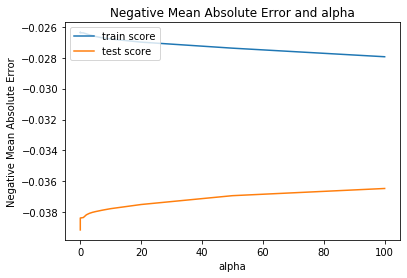

In [74]:
# plotting mean test and train scoes with alpha 
plot_train_test(cv_results,'alpha','Negative Mean Absolute Error',"Negative Mean Absolute Error and alpha")

In [75]:
print('Ridge Model Best Hyperparmeter {}'.format(model_cv.best_params_))
print('Ridge Model Best Score {}'.format(model_cv.best_score_))

Ridge Model Best Hyperparmeter {'alpha': 100}
Ridge Model Best Score -0.03646184514619234


In [76]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.33274105e-03, -6.36996438e-04,  1.10576013e-02,  2.25582286e-03,
       -1.71275291e-03,  2.28541523e-02,  1.45388525e-02, -1.04404392e-02,
       -6.22419270e-03,  2.18877136e-03,  1.99299891e-03,  7.57681012e-04,
        4.22521769e-03, -2.11278835e-04,  4.36588494e-03,  5.55804618e-03,
        1.12807549e-02, -1.11183418e-03,  2.49915390e-03,  7.81593034e-04,
        1.34659391e-02,  5.81141923e-03,  8.74508428e-03,  1.62793432e-02,
        1.02925733e-02,  6.73797898e-04,  2.14318565e-02,  3.72947345e-03,
       -7.98602724e-04,  1.09660649e-02,  6.10676095e-03,  2.83825840e-03,
       -5.16261178e-03,  6.95519814e-03,  6.87264779e-03,  4.36929613e-03,
        2.71095325e-03,  8.94027595e-04,  4.04758184e-03,  9.18009433e-03,
        7.05344283e-03,  2.51371163e-03,  5.46593729e-03,  4.35946943e-03,
        1.62354907e-03,  5.04573627e-03,  4.63626960e-04,  9.30244428e-04,
        5.69936982e-03,  2.91948489e-03,  7.89855149e-03,  1.85122863e-03,
       -3.26410464e-03,  

In [77]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('Y_Train_Pred R2 Score Using Ridge for alpha {} is {}'.format(alpha,r2_score(y_true=y_train, y_pred=y_train_pred)))
print('Y_Test_Pred R2 Score Using Ridge for alpha {} is {}'.format(alpha,r2_score(y_true=y_test, y_pred=y_test_pred)))
print ('RMSE is for train data is ', mean_squared_error(y_train, y_train_pred))
print ('RMSE is for test data is ', mean_squared_error(y_test, y_test_pred))

Y_Train_Pred R2 Score Using Ridge for alpha 100 is 0.9382527405892611
Y_Test_Pred R2 Score Using Ridge for alpha 100 is 0.9084555994299499
RMSE is for train data is  0.0017004951889488364
RMSE is for test data is  0.0026571687410823566


In [78]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
df_model_parameters = pd.DataFrame({'features':cols,'coefficients':model_parameters}) 
df_model_parameters= df_model_parameters[~(df_model_parameters['features']=='constant')]
df_model_parameters.sort_values(by='coefficients',ascending=False).head(10)

,features,coefficients
6,OverallQual,0.023
27,GrLivArea,0.021
24,1stFlrSF,0.016
7,OverallCond,0.015
21,TotalBsmtSF,0.013
17,BsmtFinSF1,0.011
3,LotArea,0.011
30,FullBath,0.011
25,2ndFlrSF,0.010
83,Neighborhood_StoneBr,0.009


### Observation
- We can observe that overall R2 score for the train data is 0.94 while for test 0.91
- We can come to conclusion, the model is not overfitting since the model is performing considerably well with test data as well
- Best hyper parameter obtained is 100 for Ridge 

### Doubling alpha and building the Ridge model again

In [79]:
alpha = 200
ridge_model_1 = Ridge(alpha=alpha)

ridge_model_1.fit(X_train, y_train)
ridge_model_1.coef_

array([-2.10293371e-03, -1.63752820e-05,  9.74357275e-03,  1.24187455e-03,
       -1.52274336e-03,  2.00145941e-02,  1.23436298e-02, -7.95738808e-03,
       -7.07333905e-03,  2.78372828e-03,  3.82975705e-03,  1.04773033e-03,
        4.99955088e-03,  3.16773587e-04,  4.35531381e-03,  5.66632731e-03,
        1.06451661e-02, -6.92776937e-04,  1.99261602e-03,  8.47911672e-04,
        1.27060049e-02,  5.60123518e-03,  8.47396114e-03,  1.50936734e-02,
        8.63810079e-03,  5.15175254e-04,  1.90680338e-02,  3.69276554e-03,
       -7.49264170e-04,  1.03984986e-02,  5.78152031e-03,  3.40587341e-03,
       -4.40184273e-03,  7.64949642e-03,  8.08187884e-03,  5.03681186e-03,
        3.65562365e-03,  6.09418293e-05,  4.20337825e-03,  8.48998125e-03,
        7.70435704e-03,  2.10862564e-03,  5.06379895e-03,  4.61247946e-03,
        1.12620525e-03,  4.51948688e-03,  6.56878802e-04,  7.27883108e-04,
        4.37409577e-03,  1.98351681e-03,  5.79288631e-03, -1.00229140e-03,
       -2.56488425e-03,  

In [80]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge_model_1.predict(X_train)
y_test_pred = ridge_model_1.predict(X_test)

print('Y_Train_Pred R2 Score Using Ridge for alpha {} is {}'.format(alpha,r2_score(y_true=y_train, y_pred=y_train_pred)))
print('Y_Test_Pred R2 Score Using Ridge for alpha {} is {}'.format(alpha,r2_score(y_true=y_test, y_pred=y_test_pred)))
print ('RMSE is for train data is ', mean_squared_error(y_train, y_train_pred))
print ('RMSE is for test data is ', mean_squared_error(y_test, y_test_pred))

Y_Train_Pred R2 Score Using Ridge for alpha 200 is 0.9342166467895475
Y_Test_Pred R2 Score Using Ridge for alpha 200 is 0.9067809049336384
RMSE is for train data is  0.001811647621527333
RMSE is for test data is  0.002705778441279764


In [81]:
# ridge model parameters
model_parameters = list(ridge_model_1.coef_)
model_parameters.insert(0, ridge_model_1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
df_model_parameters = pd.DataFrame({'features':cols,'coefficients':model_parameters}) 
df_model_parameters= df_model_parameters[~(df_model_parameters['features']=='constant')]
df_model_parameters.sort_values(by='coefficients',ascending=False).head(10)

,features,coefficients
6,OverallQual,0.020
27,GrLivArea,0.019
24,1stFlrSF,0.015
21,TotalBsmtSF,0.013
7,OverallCond,0.012
17,BsmtFinSF1,0.011
3,LotArea,0.010
30,FullBath,0.010
25,2ndFlrSF,0.009
34,KitchenQual,0.008


### Observation
- Similar to earlier the R2 score for the train data is 0.93 while for test 0.91. Not much difference is seen in the R2 score
- The Coefficients of the features we obtained for hyper-parameter as 200 is lesser compared to model built with hyper parameter 100

## Building Model using Lasso

In [82]:
lasso = Lasso()

#Specify number of folds
folds =KFold(n_splits=5, shuffle=True,random_state=4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# build model
model_cv= GridSearchCV(estimator=lasso,param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds, 
                       return_train_score=True,
                       verbose = 1)
model_cv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.582668,0.221300,0.034183,0.017996,0.0001,{'alpha': 0.0001},-0.036578,-0.034354,-0.036595,-0.042746,-0.037259,-0.037507,0.002798,2,-0.026782,-0.027730,-0.026894,-0.024959,-0.026791,-0.026631,0.000908
1,0.070759,0.057634,0.017990,0.013273,0.001,{'alpha': 0.001},-0.034425,-0.032205,-0.033130,-0.040197,-0.034561,-0.034904,0.002785,1,-0.028891,-0.029449,-0.029260,-0.027052,-0.028555,-0.028642,0.000852
2,0.013391,0.001198,0.004798,0.001166,0.01,{'alpha': 0.01},-0.039936,-0.033966,-0.038226,-0.045024,-0.039773,-0.039385,0.003549,3,-0.038171,-0.039397,-0.038480,-0.037718,-0.037969,-0.038347,0.000581
3,0.010794,0.000748,0.005197,0.001469,0.05,{'alpha': 0.05},-0.071391,-0.066956,-0.064714,-0.081330,-0.068644,-0.070607,0.005788,4,-0.069280,-0.070587,-0.070100,-0.069897,-0.069973,-0.069967,0.000419
4,0.008795,0.000748,0.004997,0.001264,0.1,{'alpha': 0.1},-0.105306,-0.106042,-0.100259,-0.118735,-0.106396,-0.107348,0.006111,5,-0.106564,-0.108567,-0.108869,-0.105017,-0.107373,-0.107278,0.001402


In [84]:
print('Lasso Model Best Hyperparmeter {}'.format(model_cv.best_params_))
print('Lasso Model Best Score {}'.format(model_cv.best_score_))

Lasso Model Best Hyperparmeter {'alpha': 0.001}
Lasso Model Best Score -0.0349035263137243


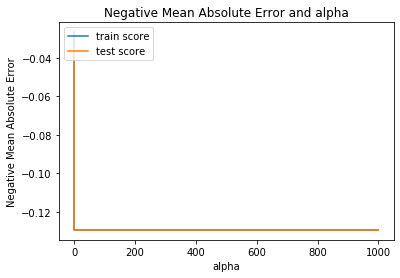

In [85]:
# plotting mean test and train scoes with alpha 
plot_train_test(cv_results,'alpha','Negative Mean Absolute Error',"Negative Mean Absolute Error and alpha")

### Building the model using the best hyperparameter

In [86]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)

lasso_model.fit(X_train, y_train)
lasso_model.coef_

array([-1.79149203e-03,  0.00000000e+00,  1.18639407e-02,  0.00000000e+00,
       -1.20442934e-03,  3.16132316e-02,  1.63038109e-02, -1.84248318e-02,
       -5.01581273e-03,  1.80671298e-03,  4.02174221e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.92098045e-03,  3.87727564e-03,
        1.19517726e-02,  0.00000000e+00,  4.36818608e-04, -0.00000000e+00,
        1.37601040e-02,  5.07377662e-03,  7.76899046e-03,  4.50878455e-03,
        0.00000000e+00, -1.52433479e-04,  4.86582233e-02,  4.23462466e-03,
       -0.00000000e+00,  7.47272846e-03,  3.27475531e-03,  0.00000000e+00,
       -4.83202232e-03,  5.14696131e-03,  2.35548650e-03,  3.89074520e-03,
        8.24140313e-04, -0.00000000e+00,  2.86273751e-03,  1.12342698e-02,
        5.20359337e-03,  3.51934939e-04,  4.30741353e-03,  3.40940415e-03,
        2.14007611e-04,  3.99421957e-03,  0.00000000e+00,  0.00000000e+00,
        4.74098166e-03,  7.63233447e-04,  7.52056651e-03, -0.00000000e+00,
       -3.33582311e-04,  

In [87]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

print('Y_Train_Pred R2 Score Using Lasso {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print('Y_Test_Pred R2 Score Using Lasso {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))
print ('RMSE is for train data is ', mean_squared_error(y_train, y_train_pred))
print ('RMSE is for test data is ', mean_squared_error(y_test, y_test_pred))

Y_Train_Pred R2 Score Using Lasso 0.9347386983810675
Y_Test_Pred R2 Score Using Lasso 0.9156640350766707
RMSE is for train data is  0.0017972705264427133
RMSE is for test data is  0.0024479366116096895


In [88]:
# lasso model parameters
model_parameters = list(lasso_model.coef_)
model_parameters.insert(0, lasso_model.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
df_model_parameters = pd.DataFrame({'features':cols,'coefficients':model_parameters}) 
feature_parameters = df_model_parameters[(df_model_parameters.coefficients!=0) & (df_model_parameters.features !='constant') ]
feature_parameters.sort_values(by='coefficients',ascending=False).head(10)

,features,coefficients
27,GrLivArea,0.049
6,OverallQual,0.032
7,OverallCond,0.016
21,TotalBsmtSF,0.014
17,BsmtFinSF1,0.012
3,LotArea,0.012
40,GarageCars,0.011
51,MSZoning_RL,0.008
23,CentralAir,0.008
67,Neighborhood_Crawfor,0.008


In [89]:
print('Total No. of features given as input to the model {} '.format(len(df_model_parameters)))
print('No. of features identified by lasso {} '.format(len(feature_parameters)))

Total No. of features given as input to the model 192 
No. of features identified by lasso 85 


### Observation
- We can observe that overall R2 score for the train data is 0.93 while for test 0.92
- We can come to conclusion, the model is not overfitting since the model is performing considerably well with test data as well
- Best hyper parameter obtained is 0.001 for Lasso 
- Overall number of features given to the model was 192 while lasso made the coefficients of some the features with lesser signifance to 0 and finally we have 85 features 

#### Top 5 features that are important are 
- GrLivArea
- OverallQual
- OverallCond
- TotalBsmtSF
- BsmtFinSF1

### Buildin Model after doubling lasso parameter

In [90]:
alpha = 0.002
lasso_model_1 = Lasso(alpha=alpha)

lasso_model_1.fit(X_train, y_train)
lasso_model_1.coef_

array([-1.15985678e-03,  0.00000000e+00,  1.13875217e-02, -0.00000000e+00,
       -0.00000000e+00,  3.38413825e-02,  1.45062041e-02, -1.66330033e-02,
       -5.83341863e-03,  1.35824022e-03,  2.26382058e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.87511575e-03,  3.47198044e-03,
        1.23827943e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.43981260e-02,  4.94297073e-03,  7.40161490e-03,  2.94317125e-03,
        0.00000000e+00, -6.80065340e-06,  4.90673769e-02,  2.91975039e-03,
       -0.00000000e+00,  5.25170380e-03,  1.46721270e-03,  0.00000000e+00,
       -3.12151750e-03,  5.43912097e-03,  1.77902072e-03,  4.66515474e-03,
        5.88575594e-04, -0.00000000e+00,  3.90739353e-03,  1.11762693e-02,
        6.22739679e-03,  0.00000000e+00,  3.22681974e-03,  3.16298603e-03,
        0.00000000e+00,  2.50918116e-03,  0.00000000e+00,  0.00000000e+00,
        3.13703920e-03,  0.00000000e+00,  7.69242101e-03, -0.00000000e+00,
       -0.00000000e+00,  

In [91]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso_model_1.predict(X_train)
y_test_pred = lasso_model_1.predict(X_test)

print('Y_Train_Pred R2 Score Using Lasso {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print('Y_Test_Pred R2 Score Using Lasso {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))
print ('RMSE is for train data is ', mean_squared_error(y_train, y_train_pred))
print ('RMSE is for test data is ', mean_squared_error(y_test, y_test_pred))

Y_Train_Pred R2 Score Using Lasso 0.9273672999235152
Y_Test_Pred R2 Score Using Lasso 0.9124763822940335
RMSE is for train data is  0.0020002759348206047
RMSE is for test data is  0.002540461455059471


In [92]:
# lasso model parameters
model_parameters = list(lasso_model_1.coef_)
model_parameters.insert(0, lasso_model_1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
df_model_parameters = pd.DataFrame({'features':cols,'coefficients':model_parameters}) 
feature_parameters = df_model_parameters[(df_model_parameters.coefficients!=0) & (df_model_parameters.features !='constant') ]
feature_parameters.sort_values(by='coefficients',ascending=False).head(10)

,features,coefficients
27,GrLivArea,0.049
6,OverallQual,0.034
7,OverallCond,0.015
21,TotalBsmtSF,0.014
17,BsmtFinSF1,0.012
40,GarageCars,0.011
3,LotArea,0.011
51,MSZoning_RL,0.008
67,Neighborhood_Crawfor,0.007
23,CentralAir,0.007


In [93]:
print('Total No. of features given as input to the model {} '.format(len(df_model_parameters)))
print('No. of features identified by lasso {} '.format(len(feature_parameters)))

Total No. of features given as input to the model 192 
No. of features identified by lasso 62 


### Observation
- We can observe that overall R2 score for the train data is 0.93 while for test 0.91
- We can come to conclusion, the model is not overfitting since the model is performing considerably well with test data as well
- After doubling the alpha, only 62 features were considered as significant by lasso model

### Building Lasso Model after dropping the 5 most import features

- As per our analysis 5 most important features are 
    - GrLivArea 	
    - OverallQual 
    - OverallCond 	
    - TotalBsmtSF
    - BsmtFinSF1 	
    

In [94]:
features_dropped = ['GrLivArea','OverallQual','BsmtFinSF1','OverallCond','TotalBsmtSF']
X_train_dropped = X_train.drop(features_dropped,axis=1)
X_test_dropped = X_test.drop(features_dropped,axis=1)

### Building Model using dropped feature data set

In [95]:
lasso = Lasso()

#Specify number of folds
folds =KFold(n_splits=5, shuffle=True,random_state=4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# build model
model_cv= GridSearchCV(estimator=lasso,param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds, 
                       return_train_score=True,
                       verbose = 1)
model_cv.fit(X_train_dropped,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.324417,0.131914,0.011793,0.003706,0.0001,{'alpha': 0.0001},-0.038951,-0.039686,-0.040292,-0.047748,-0.041844,-0.041704,0.003168,2,-0.030215,-0.030886,-0.029869,-0.028120,-0.029534,-0.029725,0.000919
1,0.040778,0.007022,0.008796,0.001833,0.001,{'alpha': 0.001},-0.036520,-0.035932,-0.037248,-0.046713,-0.038147,-0.038912,0.003970,1,-0.032583,-0.033186,-0.032436,-0.030356,-0.031460,-0.032004,0.000993
2,0.024585,0.001956,0.010994,0.004047,0.01,{'alpha': 0.01},-0.041713,-0.038917,-0.043712,-0.055187,-0.043293,-0.044565,0.005572,3,-0.042809,-0.043452,-0.043346,-0.041673,-0.042683,-0.042793,0.000633
3,0.034180,0.005488,0.013793,0.000978,0.05,{'alpha': 0.05},-0.078505,-0.072418,-0.072181,-0.088517,-0.075708,-0.077466,0.005995,4,-0.076804,-0.076687,-0.076839,-0.075554,-0.077328,-0.076642,0.000587
4,0.023787,0.003486,0.008795,0.001721,0.1,{'alpha': 0.1},-0.118526,-0.120344,-0.110042,-0.129959,-0.117882,-0.119351,0.006372,5,-0.118157,-0.120541,-0.119692,-0.117120,-0.118892,-0.118880,0.001186


In [97]:
print('Lasso Model Best Hyperparmeter {}'.format(model_cv.best_params_))
print('Lasso Model Best Score {}'.format(model_cv.best_score_))

Lasso Model Best Hyperparmeter {'alpha': 0.001}
Lasso Model Best Score -0.03891213608920922


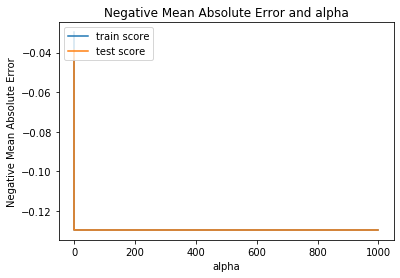

In [98]:
# plotting mean test and train scoes with alpha 
plot_train_test(cv_results,'alpha','Negative Mean Absolute Error',"Negative Mean Absolute Error and alpha")

### Observation
 - Its observed that here as well we have obtained the best parameter as 0.001

In [99]:
alpha = 0.001
lasso_model_2 = Lasso(alpha=alpha)

lasso_model_2.fit(X_train_dropped, y_train)
lasso_model_2.coef_

array([-2.08104509e-03,  0.00000000e+00,  8.02144436e-03,  0.00000000e+00,
       -2.97012095e-03, -8.45868868e-03, -1.04928721e-02,  2.19770243e-03,
        6.28673110e-03,  2.67596697e-03,  8.53041371e-03,  2.34092303e-03,
        5.94445784e-03,  1.14109715e-02, -0.00000000e+00,  0.00000000e+00,
       -2.35246317e-04,  5.37312772e-03,  1.26376037e-02,  5.74611658e-02,
        4.39453998e-02,  1.72520552e-03,  4.91956779e-03,  0.00000000e+00,
        9.16980630e-03,  4.91300931e-03,  1.53211219e-03, -6.40320228e-03,
        1.17402771e-02,  2.06361916e-03,  6.37753927e-03,  1.18671560e-03,
        0.00000000e+00,  3.31030650e-03,  9.32801064e-03,  7.37078409e-03,
        0.00000000e+00,  4.35377114e-03,  5.33931741e-03,  0.00000000e+00,
        4.93873259e-03,  2.27056968e-04,  0.00000000e+00,  2.67633130e-03,
        1.75051224e-04,  5.18916308e-03,  0.00000000e+00, -1.87756726e-03,
        3.36872127e-03, -1.69009295e-03, -0.00000000e+00, -1.81217034e-03,
        4.10733767e-04, -

In [100]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso_model_2.predict(X_train_dropped)
y_test_pred = lasso_model_2.predict(X_test_dropped)

print('Y_Train_Pred R2 Score Using Lasso {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print('Y_Test_Pred R2 Score Using Lasso {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))
print ('RMSE is for train data is ', mean_squared_error(y_train, y_train_pred))
print ('RMSE is for test data is ', mean_squared_error(y_test, y_test_pred))

Y_Train_Pred R2 Score Using Lasso 0.9207858118524693
Y_Test_Pred R2 Score Using Lasso 0.8831126541783368
RMSE is for train data is  0.0021815275224658245
RMSE is for test data is  0.0033927733385259594


In [101]:
# lasso model parameters
model_parameters = list(lasso_model_2.coef_)
model_parameters.insert(0, lasso_model_2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_dropped.columns
cols = cols.insert(0, "constant")
df_model_parameters = pd.DataFrame({'features':cols,'coefficients':model_parameters}) 
feature_parameters = df_model_parameters[(df_model_parameters.coefficients!=0) & (df_model_parameters.features !='constant') ]
feature_parameters.sort_values(by='coefficients',ascending=False).head(10)

,features,coefficients
20,1stFlrSF,0.057
21,2ndFlrSF,0.044
19,CentralAir,0.013
29,KitchenQual,0.012
14,BsmtFinType1,0.011
72,Neighborhood_NridgHt,0.010
62,Neighborhood_Crawfor,0.010
165,Functional_Typ,0.009
25,FullBath,0.009
35,GarageCars,0.009


In [102]:
print('Total No. of features given as input to the model {} '.format(len(df_model_parameters)))
print('No. of features identified by lasso {} '.format(len(feature_parameters)))

Total No. of features given as input to the model 187 
No. of features identified by lasso 93 


### Observation
- We can observe that overall R2 score for the train data is 0.92 while for test 0.88
- We can come to conclusion, the model is not overfitting since the model is performing considerably well with test data as well
- Best hyper parameter obtained is 0.001 for Lasso 
- Overall number of features given to the model was 187 while lasso made the coefficients of some the features with lesser signifance to 0 and finally we have 93 features 
- Lets try to build the models using Polynomial Regression and see how the model performs